## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## check missing values in dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

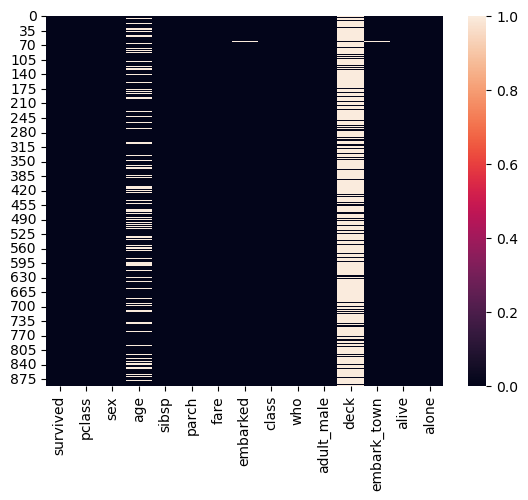

In [5]:
sns.heatmap(df.isnull())

In [6]:
## HAndling missing by deleting rows

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
## rowwise deletion
df.dropna().shape

(182, 15)

In [9]:
df.shape

(891, 15)

In [10]:
## Handling missing values by deleting columns

In [11]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Technqiues
### 1-Mean Value Imputation

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_11404\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot:xlabel='age', ylabel='Density'>

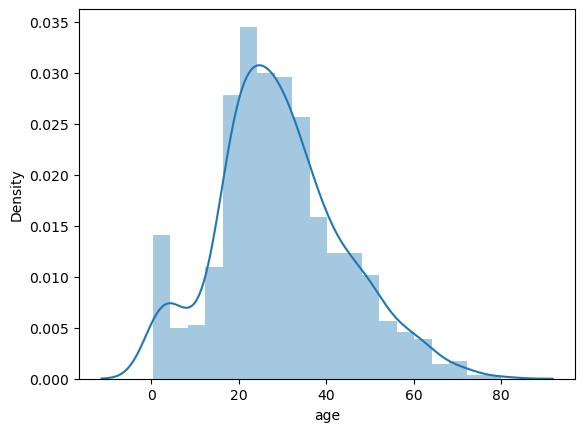

In [12]:
sns.distplot(df['age'])

In [13]:
df.age.isnull().sum()

177

In [14]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [15]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [16]:
## This tecnqiue work well when your data is normally distributed

### 2- Median Value Imputation
If you have ooutliers in dataset use thi technique

In [17]:
df['Age_median']=df['age'].fillna(df['age'].median())

In [18]:
df[['Age_median','Age_mean','age']]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3- Mode Value Imputation-- Categorical 

In [19]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [22]:
mode=df[df['age'].notna()]['embarked'].mode()[0]

In [23]:
mode

'S'

In [24]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [25]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [26]:
df['embarked_mode'].isnull().sum()

0

In [27]:
df['embarked'].isnull().sum()

2

# SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [28]:
from sklearn.datasets import make_classification

In [29]:
## X independent feature
## y dependent feature
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [30]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [31]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [32]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

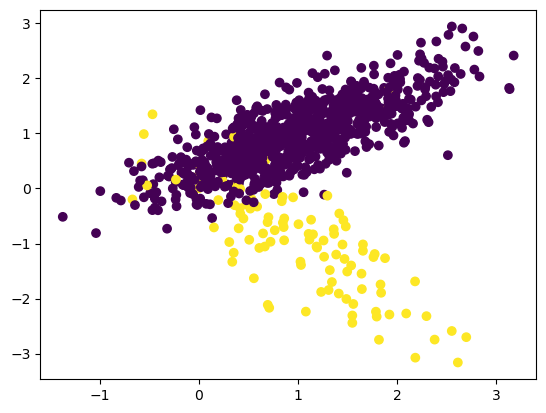

In [33]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [34]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [37]:
X.shape

(1788, 2)

In [38]:
len(y[y==0])

894

In [39]:
len(y[y==1])

894

In [40]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

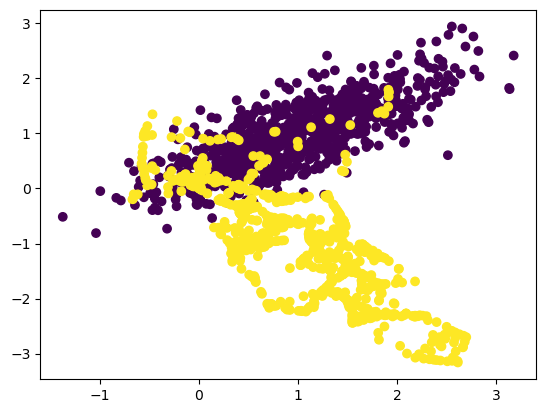

In [41]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

## 3. Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

## 1. Linear Interpolation

In [42]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

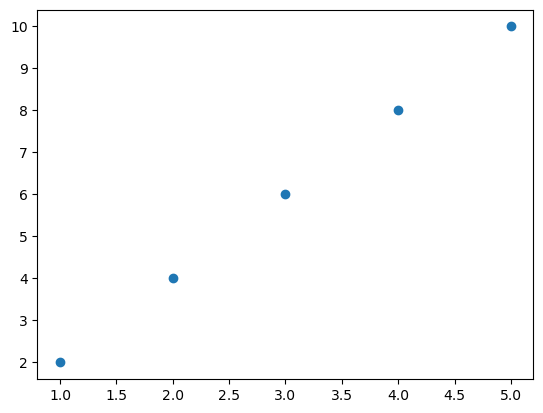

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [44]:
## interpolate the data using linear interpolation
x_new=np.linspace(1,5,10) ##create new x values
y_interp=np.interp(x_new,x,y) ## interpolate y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


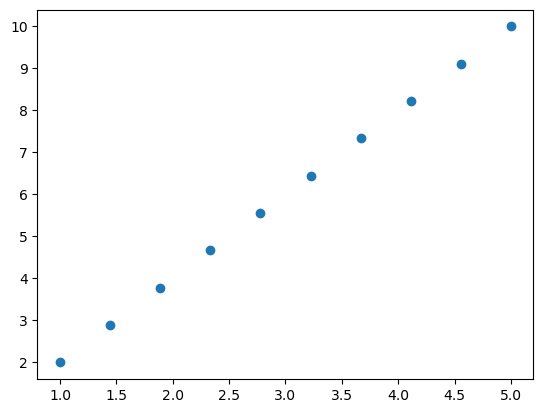

In [45]:
plt.scatter(x_new,y_interp)

## Cubic Interpolation With Scipy

In [46]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [47]:
from scipy.interpolate import interp1d

In [48]:
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [49]:
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


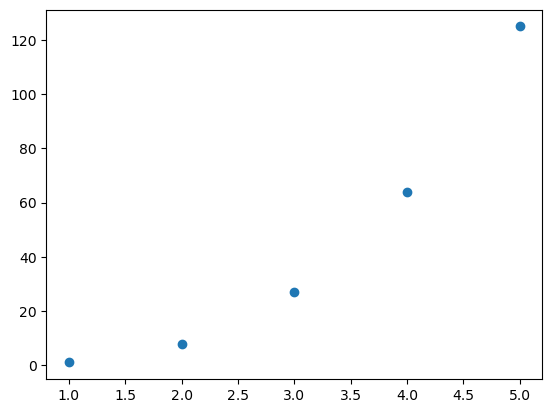

In [50]:
plt.scatter(x,y)

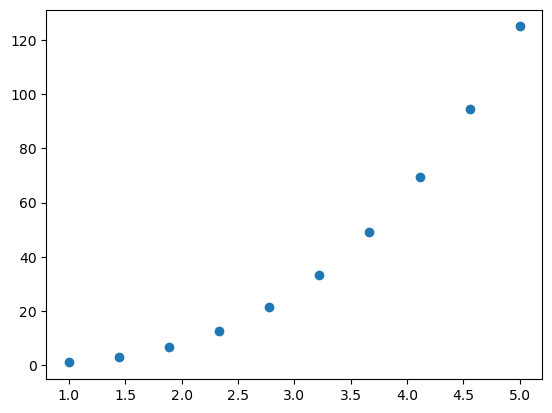

In [51]:
plt.scatter(x_new,y_interp)

## Polynomial Interpolation

In [52]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [53]:
# interpolate the data using polynomial interpolation
p = np.polyfit(x, y, 2) # fit a 2nd degree polynomial to the data

In [54]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

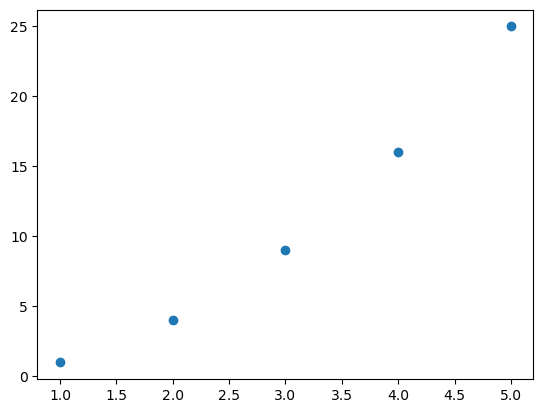

In [55]:
plt.scatter(x,y)

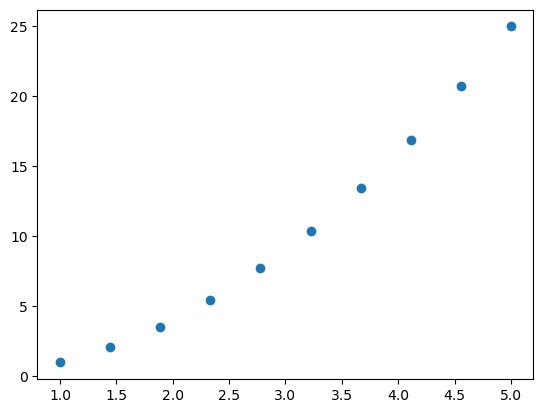

In [56]:
plt.scatter(x_new,y_interp)

## 4. Imbalanced Dataset Handling
1. Upsampling
2. Down Sampling

In [57]:
import numpy as np
import pandas as pd

In [58]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [59]:
n_class_0,n_class_1

(900, 100)

In [60]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [61]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [62]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [63]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

## Upsampling

In [64]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [65]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [66]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [67]:
##Upsampling perform
from sklearn.utils import resample

In [68]:
df_minority_upsample=resample(df_minority,
                             replace=True, ## Sample With replacement
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )

In [69]:
df_minority_upsample.shape

(900, 3)

In [70]:
df_minority_upsample.shape

(900, 3)

In [71]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [72]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [73]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [74]:
df_upsampled.shape

(1800, 3)

## DownSampling

In [75]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [76]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [77]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [78]:
df_majority_downsample=resample(df_majority,
                             replace=False, ## Sample Without replacement
                              n_samples=len(df_minority), # to match the minority class)
                              random_state=42
                             )

In [79]:
df_majority_downsample.shape

(100, 3)

In [80]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [81]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

## Handling Outliers

## 5 number Summary
1. Minimum Value
2. Q1- 25 percentile
3. Median
4. Q3- 75 percentile
5. MAximum

In [82]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]

In [83]:
## [Lower Fence<---> Higher Fence]
Q1=np.percentile(lst_marks,[25])
print(Q1)

[54.]


In [84]:
minimum,Q1,Q2,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [85]:
maximum

1100.0

In [86]:
IQR=Q3-Q1
print(IQR)

35.5


In [87]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [88]:
lower_fence,higher_fence

(0.75, 142.75)

In [89]:
outliers=[]
for i in lst_marks:
    if i>=0.75 and i<=142.75:
        print("This element is not an outlier")
    else:
        outliers.append(i)

This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier


In [90]:
outliers

[1000, 1100]

In [91]:
import seaborn as sns

<AxesSubplot:>

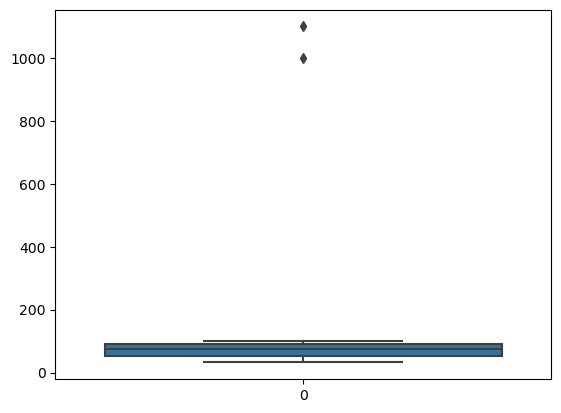

In [92]:
sns.boxplot(lst_marks)

In [93]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<AxesSubplot:>

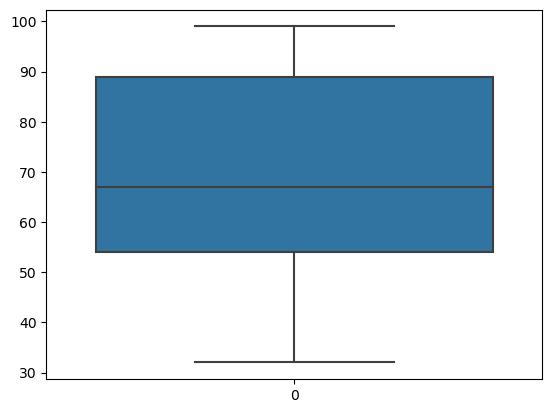

In [94]:
sns.boxplot(lst_marks)